In [130]:
import os
import numpy as np
import pandas as pd

In [131]:
current_dir = os.getcwd()
current_dir

'd:\\Final Sem Project\\xai-proj\\ml-model\\notebooks'

In [132]:
parent_dir = os.path.dirname(current_dir)
parent_dir

'd:\\Final Sem Project\\xai-proj\\ml-model'

In [133]:
data_dir = os.path.join(parent_dir, "data\\raw")
data_dir

'd:\\Final Sem Project\\xai-proj\\ml-model\\data\\raw'

In [134]:
data_file = os.path.join(data_dir, 'automobile-insurance-company-complaint-rankings-beginning-2009-1.csv')
data_file

'd:\\Final Sem Project\\xai-proj\\ml-model\\data\\raw\\automobile-insurance-company-complaint-rankings-beginning-2009-1.csv'

In [135]:
data = pd.read_csv(data_file)
data.head()

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,32786,Progressive Specialty Insurance Company,0.0,0,17,29,46,204.173,1,2016
1,19976,Amica Mutual Insurance Company,0.0,0,9,8,17,84.769,2,2016
2,25453,Nationwide Insurance Company of America,0.0,0,9,4,13,65.335,3,2016
3,15024,Preferred Mutual Insurance Company,0.0,0,3,2,5,62.505,4,2016
4,10052,Chubb National Insurance Company,0.0,0,1,2,3,46.735,5,2016


In [136]:
# Check if any missing values or not
data.isnull().sum()

NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 0
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64

In [137]:
import matplotlib.pyplot as plt
import numpy as np

In [138]:
# # Creating dataset
# np.random.seed(10)
# data = np.random.normal(100, 20, 200)

# fig = plt.figure(figsize =(10, 7))

# # Creating plot
# plt.boxplot(data)

# # show plot
# plt.show()

In [139]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
categorical_columns = ['Company Name']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

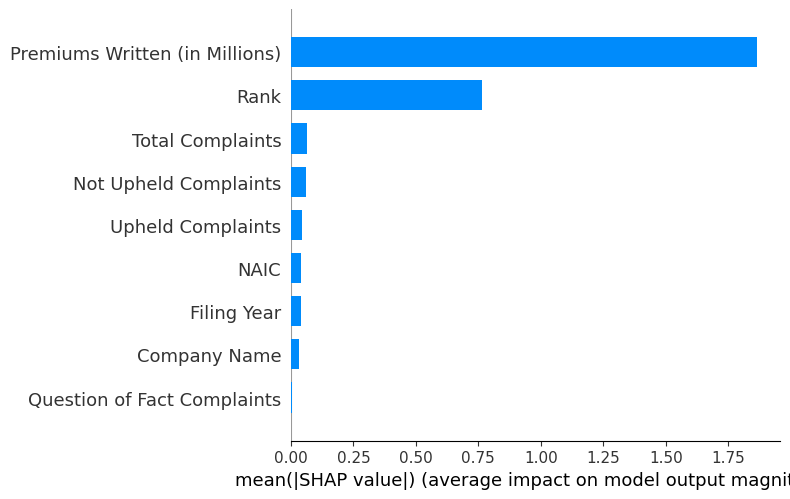

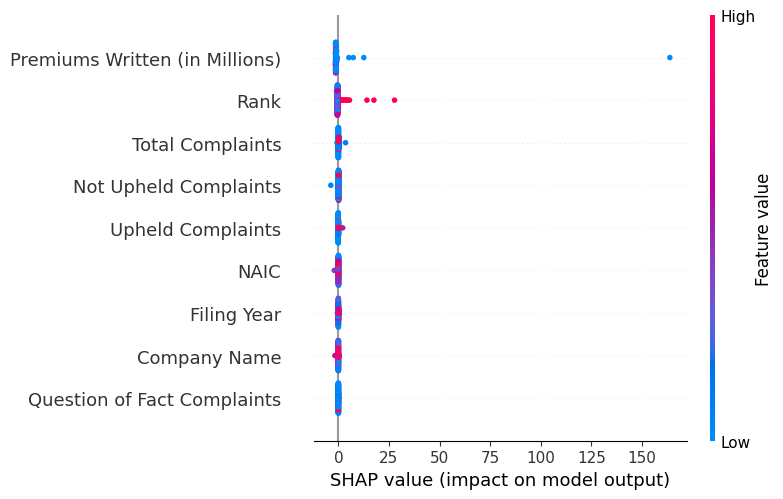

IndexError: invalid index to scalar variable.

In [140]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into features and target variable
X = data.drop(columns=['Ratio'])
y = data["Ratio"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a machine learning model (example: Random Forest classifier)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize the SHAP explainer with the trained model and the training data
explainer = shap.Explainer(model, X_train)

# # Generate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# # Visualize global feature importance using summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# # Visualize global feature importance using force plot
shap.summary_plot(shap_values, X_test)

# # Visualize local explanations for a specific instance using force plot
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# # Visualize dependency plots for individual features
shap.dependence_plot("feature_name", shap_values[1], X_test)
